### Exercício 1

#### Pratica 1 -  Dataset 2D (datasets/2d_dataset.csv)

#### Descricao

Atributos

- alpha (numérico): valor x
- beta (numérico): valor y
- y (0 ou 1, numérico): classe

Etapas:
1. Importe as bibliotecas necessárias para analise dos dados
```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
```
2. Carregue o Dataset em um DataFrame
```python
df = pd.read_csv('datasets/2d_dataset.csv')
```
3. Analise as features através do seaborn e pandas (tipos de dados, histogramas)
4. Plote a relação entre as classes através do matplotlib (scatter, X versus Y)
5. Determine a quantidade de instâncias para cada classe desejada
6. Treine um modelo de kNN (efetuando as etapas de preprocessamento necessárias)
    - Formula de normalização
    \begin{equation*}
    valor =
    \frac{valor - valor^{min}}{valor^{max} - valor^{min}}
    \end{equation*}
7. Avalie o modelo treinado
    - Formula da acurácia
    \begin{equation*}
    Acc =
    \frac{Quantidade\;de\;eventos\;corretamente\;classificados}{Quantidade\;total\;de\;eventos}
    \end{equation*}
8. Faça busca dos melhores hiperparametros do kNN
    - Varie de 1 a 100 a quantidade de vizinhos
    - Plote a relação entre acurácia e quantidade de vizinhos
    - Plote a relação entre quantidade de vizinhos e tempo de treinamento
    - Plote a relação entre quantidade de vizinhos e tempo de teste
    - Para medir o tempo utilize o seguinte código
    ```python
    import time
    comeco = int(round(time.time() * 1000))
    # seu codigo aqui
    tempo_total = int(round(time.time() * 1000)) - comeco
    ```

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [66]:
df = pd.read_csv('datasets/2d_dataset.csv')

In [67]:
df.head(10)

,y,alpha,beta
0,1,681,604
1,1,517,783
2,0,384,513
3,1,41,694
4,0,783,449
5,1,455,903
6,1,191,262
7,0,760,666
8,1,14,220
9,0,446,828


In [68]:
df.dtypes

y        int64
alpha    int64
beta     int64
dtype: object

In [69]:
df.describe()

,y,alpha,beta
count,2994.000000,2994.000000,2994.000000
mean,0.656981,500.917502,501.393454
std,0.474797,289.387318,286.933215
min,0.000000,0.000000,0.000000
25%,0.000000,248.000000,256.000000
50%,1.000000,505.500000,499.000000
75%,1.000000,755.000000,749.000000
max,1.000000,998.000000,999.000000


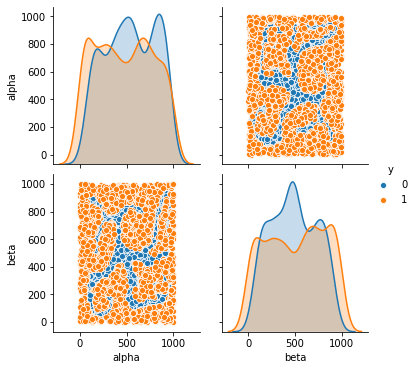

In [70]:
sns.pairplot(df, hue='y')

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
froms klearn.preprocessing import MaxAbsScaler

_class = np.array(df['y'])
features = np.array(df.drop('y', axis =1))

features, _class
kNN = KNeighborsClassifier(n_neighbors = 10)
kNN.fit(features, _class)

SyntaxError: invalid syntax (<ipython-input-71-d2bcf8337ee2>, line 3)

In [ ]:
predict = kNN.predict(features)
predict

In [ ]:
predict == _class

In [ ]:
len(df[predict == _class])

In [ ]:
(len(df[predict == _class]) / len(df)) * 100

In [ ]:
arr_acc = []
arr_training_time = []
arr_classification_time = []

for sample in range(1,101):
    
    # Training timer start
    start_training_time = int(round(time.time() * 1000))

    kNN = KNeighborsClassifier(n_neighbors= sample)
    kNN.fit(features, _class)
    
    # Training total time
    training_time = int(round(time.time()*1000))- start_training_time
    arr_training_time.append(training_time)
    
    # Classification timer start
    start_classification_time = int(round(time.time() * 1000))
    predict = kNN.predict(features)
    
    # Classification total time
    classification_time = int(round(time.time()*1000))- start_classification_time
    arr_classification_time.append(classification_time)
    
    arr_acc.append(accuracy_score(predict, _class))
  
    
plt.plot(arr_acc)
plt.show()
plt.plot(arr_training_time)
plt.show()
plt.plot(arr_classification_time)
plt.show()

#### Pratica 2 -  Dataset 2D (datasets/2d_dataset_1.csv)

#### Descricao

Atributos

- alpha (numérico): valor x
- beta (numérico): valor y
- y (0 ou 1, numérico): classe

Etapas:
1. Importe as bibliotecas necessárias para analise dos dados
2. Carregue o Dataset em um DataFrame
```python
df = pd.read_csv('datasets/2d_dataset_1.csv')
```
3. Analise as features através do seaborn e pandas (tipos de dados, histogramas)
4. Plote a relação entre as classes através do matplotlib (scatter, X versus Y)
5. Determine a quantidade de instâncias para cada classe desejada
6. Treine um modelo de kNN (efetuando as etapas de preprocessamento necessárias)
    - Utilize a normalização através do sklearn
    ```python
    from sklearn.preprocessing import MaxAbsScaler

    VETOR_NUMPY_NORMALIZADO = MaxAbsScaler().fit_transform(VETOR_NUMPY)
    ```
7. Avalie o modelo treinado
8. Faça busca dos melhores hiperparametros do kNN

In [ ]:
df = pd.read_csv('datasets/2d_dataset_1.csv')

In [ ]:
df.head(5)

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
sns.pairplot(df, hue='y')

In [73]:
# Preprocessing
_class = np.array(df['y'])
features = np.array(df.drop('y', axis=1))
features = MaxAbsScaler().fit_transform(features)

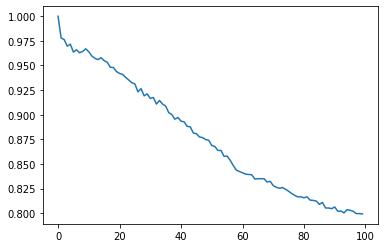

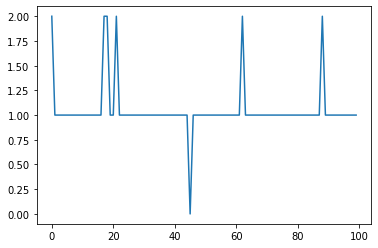

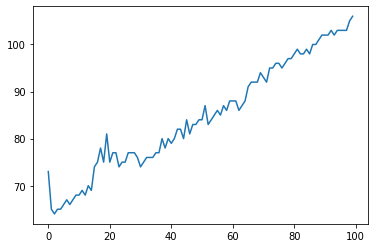

In [75]:
arr_acc = []
arr_training_time = []
arr_classification_time = []

for sample in range(1,101):
    
    # Training timer start
    start_training_time = int(round(time.time() * 1000))

    kNN = KNeighborsClassifier(n_neighbors= sample)
    kNN.fit(features, _class)
    
    # Training total time
    training_time = int(round(time.time()*1000))- start_training_time
    arr_training_time.append(training_time)
    
    # Classification timer start
    start_classification_time = int(round(time.time() * 1000))
    predict = kNN.predict(features)
    
    # Classification total time
    classification_time = int(round(time.time()*1000))- start_classification_time
    arr_classification_time.append(classification_time)
    
    arr_acc.append(accuracy_score(predict, _class))
  
    
plt.plot(arr_acc)
plt.show()
plt.plot(arr_training_time)
plt.show()
plt.plot(arr_classification_time)

#### Pratica 3 -  Dataset Heart Disease (datasets/heart.csv)

#### Descricao

Problema

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "target" field refers to the presence of heart disease in the patient. It is integer valued from 0 (not present) or 1 (present).

Atributos

- age (numérico)
- sex (numérico)
- chest pain type (4 values) (numérico)
- resting blood pressure (numérico)
- serum cholestoral in mg/dl (numérico)
- fasting blood sugar > 120 mg/dl (numérico)
- resting electrocardiographic results (values 0,1,2) (numérico)
- maximum heart rate achieved (numérico)
- exercise induced angina (numérico)
- oldpeak = ST depression induced by exercise relative to rest (numérico)
- the slope of the peak exercise ST segment (numérico)
- number of major vessels (0-3) colored by flourosopy (numérico)
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect (numérico)
- target (0 ou 1, numérico): classe

Etapas:
1. Faça busca dos melhores hiperparametros do kNN para o dataset acima

In [77]:
df = pd.read_csv('datasets/heart.csv')

In [84]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [85]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [88]:
# Preprocessing
_class = np.array(df['target'])
features = np.array(df.drop('target', axis=1))
features = MaxAbsScaler().fit_transform(features)

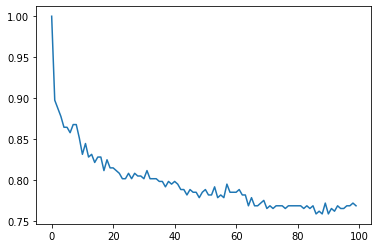

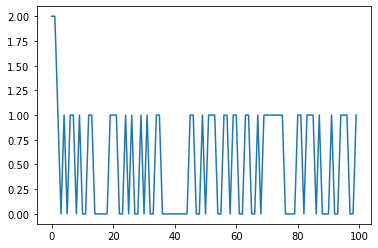

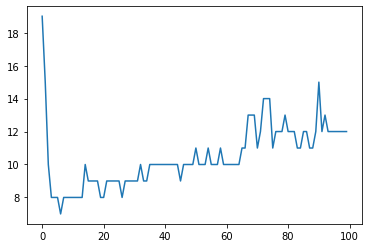

In [89]:
arr_acc = []
arr_training_time = []
arr_classification_time = []

for sample in range(1,101):
    
    # Training timer start
    start_training_time = int(round(time.time() * 1000))

    kNN = KNeighborsClassifier(n_neighbors= sample)
    kNN.fit(features, _class)
    
    # Training total time
    training_time = int(round(time.time()*1000))- start_training_time
    arr_training_time.append(training_time)
    
    # Classification timer start
    start_classification_time = int(round(time.time() * 1000))
    predict = kNN.predict(features)
    
    # Classification total time
    classification_time = int(round(time.time()*1000))- start_classification_time
    arr_classification_time.append(classification_time)
    
    arr_acc.append(accuracy_score(predict, _class))
  
    
plt.plot(arr_acc)
plt.show()
plt.plot(arr_training_time)
plt.show()
plt.plot(arr_classification_time)

#### Pratica 4 -  Income Classification (datasets/income.csv)

#### Descricao

Problema

The Us Adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more.
Each row is labelled as either having a salary greater than ">50K" or "<=50K".

Atributos

- age (numérico): idade.
- workclass (nominal): Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt (numérico): continuous.
- education (nominal): Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num (numérico): continuous.
- marital-status (nominal): Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation (nominal): Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship (nominal): Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race (nominal): White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex (nominal): Female, Male.
- capital-gain (numérico): continuous.
- capital-loss (numérico): continuous.
- hours-per-week (numérico): continuous.
- native-country (nominal): United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income (>50K ou <=50K, nominal): classe

Etapas:
1. Faça busca dos melhores hiperparametros do kNN para o dataset acima utilizando os primeiros 2000 eventos apenas
    - Atenção este dataset possui dados nominais!
        ```python
        dfNumerico = pd.get_dummies(df, prefix_sep='_', drop_first=True)
        dfNumerico = dfNumerico.head(2000)
        ```
2. Baseado no melhor K encontrado no experimento acima, faça um teste relacionando a quantidade de instâncias (1 mil a 10 mil), acurácia e tempo de teste

In [ ]:
df = pd.read_csv('datasets/income.csv')

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.sex

In [ ]:
# Mapping nominal values to numbers (first 2000 to prevent performance issues)
numericDf = pd.get_dummies(df, prefix_sep = '_', drop_first=True).head(2000)

In [ ]:
numericDf.dtypes

In [ ]:
numericDf['nativecountry_ Vietnam']

In [ ]:
numericDf.describe()

In [ ]:
# Data Normalizing

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# Getting all the attrs, removing the class attr to classify correctly
attrs = np.array(numericDf.drop('income_ >50K', axis = 1))
_class = np.array(numericDf['income_ >50K'])

attrs = MaxAbsScaler().fit_transform(attrs)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(attrs, _class)

# Prediction
prediction = knn.predict(attrs)
# Accuracy
acc = accuracy_score(prediction, _class)

acc

In [ ]:
# X = Neighbors Count
# Y = Accuracy
# 1 to 20 neighbors

#Trying different neighbors_count to see if the acc gets more precise
arr_acc = []
for neighbors_count in range (1,21):
    knn = KNeighborsClassifier(neighbors_count)
    knn.fit(attrs, _class)

    prediction = knn.predict(attrs)
    acc = accuracy_score(prediction, _class)
    arr_acc.append(acc)

plt.plot(arr_acc)
plt.xlabel('Neighbors quantity')
plt.ylabel('Accuracy')
plt.title("Neighbors quantity X Accuracy ")
plt.show()

#### Pratica 5 -  Classificação de RaioX relacionado a Covid-19 (datasets/covid/covid.csv)

#### Descricao

Problema

Dataset com raio-X de pacientes com e sem COVID-19.
- Pasta datasets/covid/Normal possui os arquivos originais com pacientes sem COVID-19
- Pasta datasets/covid/Covid possui os arquivos originais com pacientes com COVID-19
Dataset

Atributos

- histo_0 (numérico): Ocorrencias do pixel com valor 0 na imagem de entrada
- histo_1 (numérico): Ocorrencias do pixel com valor 1 na imagem de entrada
- ...
- histo_255 (numérico): Ocorrencias do pixel com valor 255 na imagem de entrada
- arquivo (nominal): nome do arquivo que gerou a entrada (estará nas pastas datasets/covid/Covid ou datasets/covid/Normal de acordo com a sua label
- label (normal ou covid, nominal): classe

Etapas:
1. Faça busca dos melhores hiperparametros do kNN para o dataset acima (k entre 10 a 100)
2. Para o melhor K
    - Liste os arquivos classificados erroneamente pelo classificador

In [90]:
df = pd.read_csv('datasets/covid/covid.csv')

In [91]:
df.describe()

,histo_0,histo_1,histo_2,histo_3,histo_4,histo_5,histo_6,histo_7,histo_8,histo_9,...,histo_246,histo_247,histo_248,histo_249,histo_250,histo_251,histo_252,histo_253,histo_254,histo_255
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,126.139854,9.079525,6.264168,5.676417,5.136197,5.115174,5.072212,4.824497,4.859232,4.806216,...,1.744059,1.673675,1.606947,1.516453,1.445155,1.520110,1.606033,1.552102,0.993601,1.244973
std,115.416076,17.655545,5.984476,6.298713,4.937367,5.325583,5.890686,6.988312,6.136174,5.721096,...,3.963042,3.940140,3.806984,3.651969,3.667594,4.257178,6.704261,9.529486,4.570777,13.998966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,115.500000,7.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,202.000000,11.000000,8.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1182.000000,418.000000,79.000000,94.000000,58.000000,66.000000,63.000000,118.000000,72.000000,87.000000,...,22.000000,32.000000,27.000000,34.000000,38.000000,59.000000,147.000000,212.000000,82.000000,350.000000


In [92]:
df.columns

Index(['histo_0', 'histo_1', 'histo_2', 'histo_3', 'histo_4', 'histo_5',
       'histo_6', 'histo_7', 'histo_8', 'histo_9',
       ...
       'histo_248', 'histo_249', 'histo_250', 'histo_251', 'histo_252',
       'histo_253', 'histo_254', 'histo_255', 'arquivo', 'label'],
      dtype='object', length=258)

In [104]:
df.dtypes

,histo_0,histo_1,histo_2,histo_3,histo_4,histo_5,histo_6,histo_7,histo_8,histo_9,...,histo_248,histo_249,histo_250,histo_251,histo_252,histo_253,histo_254,histo_255,arquivo,label
0,179,20,21,18,15,30,15,7,6,8,...,10,6,5,8,2,1,2,1,01.jpeg,normal
1,90,13,12,20,7,6,4,7,6,4,...,11,4,5,4,3,3,1,1,010.jpeg,normal
2,240,12,8,11,13,9,11,10,11,7,...,11,8,1,4,3,3,2,0,0101.jpeg,normal
3,128,12,12,15,12,11,11,11,15,11,...,8,10,7,10,17,6,7,8,0102.jpeg,normal
4,180,22,7,7,4,7,10,6,6,4,...,7,7,10,11,6,8,2,0,0103.jpeg,normal


In [107]:
numericDf = df.drop(['arquivo'], axis = 1)
numericDf = pd.get_dummies(numericDf, prefix_sep = '_', drop_first=True).head(2000)

In [108]:
numericDf.describe()

,histo_0,histo_1,histo_2,histo_3,histo_4,histo_5,histo_6,histo_7,histo_8,histo_9,...,histo_247,histo_248,histo_249,histo_250,histo_251,histo_252,histo_253,histo_254,histo_255,label_normal
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,126.139854,9.079525,6.264168,5.676417,5.136197,5.115174,5.072212,4.824497,4.859232,4.806216,...,1.673675,1.606947,1.516453,1.445155,1.520110,1.606033,1.552102,0.993601,1.244973,0.780622
std,115.416076,17.655545,5.984476,6.298713,4.937367,5.325583,5.890686,6.988312,6.136174,5.721096,...,3.940140,3.806984,3.651969,3.667594,4.257178,6.704261,9.529486,4.570777,13.998966,0.414015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,115.500000,7.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,202.000000,11.000000,8.000000,7.000000,7.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1182.000000,418.000000,79.000000,94.000000,58.000000,66.000000,63.000000,118.000000,72.000000,87.000000,...,32.000000,27.000000,34.000000,38.000000,59.000000,147.000000,212.000000,82.000000,350.000000,1.000000


In [102]:
numericDf.head(5)

,histo_0,histo_1,histo_2,histo_3,histo_4,histo_5,histo_6,histo_7,histo_8,histo_9,...,histo_247,histo_248,histo_249,histo_250,histo_251,histo_252,histo_253,histo_254,histo_255,label
0,179,20,21,18,15,30,15,7,6,8,...,9,10,6,5,8,2,1,2,1,normal
1,90,13,12,20,7,6,4,7,6,4,...,9,11,4,5,4,3,3,1,1,normal
2,240,12,8,11,13,9,11,10,11,7,...,5,11,8,1,4,3,3,2,0,normal
3,128,12,12,15,12,11,11,11,15,11,...,4,8,10,7,10,17,6,7,8,normal
4,180,22,7,7,4,7,10,6,6,4,...,8,7,7,10,11,6,8,2,0,normal


In [110]:
# Preprocessing
_class = np.array(numericDf['label_normal'])
features = np.array(numericDf.drop('label_normal', axis=1))
features = MaxAbsScaler().fit_transform(features)

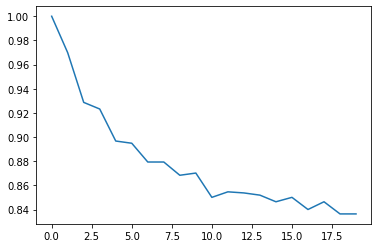

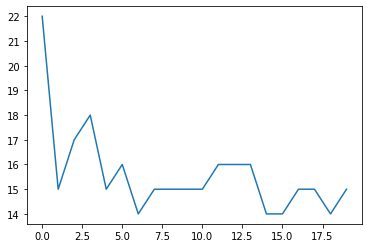

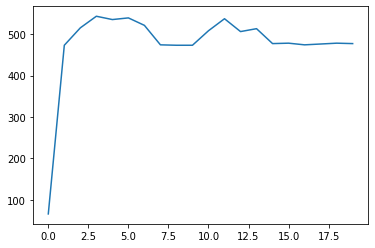

In [112]:
arr_acc = []
arr_training_time = []
arr_classification_time = []

for sample in range(1,21):
    
    # Training timer start
    start_training_time = int(round(time.time() * 1000))

    kNN = KNeighborsClassifier(n_neighbors= sample)
    kNN.fit(features, _class)
    
    # Training total time
    training_time = int(round(time.time()*1000))- start_training_time
    arr_training_time.append(training_time)
    
    # Classification timer start
    start_classification_time = int(round(time.time() * 1000))
    predict = kNN.predict(features)
    
    # Classification total time
    classification_time = int(round(time.time()*1000))- start_classification_time
    arr_classification_time.append(classification_time)
    
    arr_acc.append(accuracy_score(predict, _class))
  
    
plt.plot(arr_acc)
plt.show()
plt.plot(arr_training_time)
plt.show()
plt.plot(arr_classification_time)

In [115]:
kNN = KNeighborsClassifier(n_neighbors= 5)
kNN.fit(features, _class)
predict = kNN.predict(features)

errors = predict != _class
errors

array([False, False, False, ...,  True,  True,  True])

In [122]:
mis_classified_instances = df[errors]
mis_classified_instances

,histo_0,histo_1,histo_2,histo_3,histo_4,histo_5,histo_6,histo_7,histo_8,histo_9,...,histo_248,histo_249,histo_250,histo_251,histo_252,histo_253,histo_254,histo_255,arquivo,label
5,0,0,3,12,7,10,10,9,11,13,...,19,8,9,9,11,8,5,1,0104.jpeg,normal
14,165,8,7,8,1,6,2,1,4,3,...,7,6,6,11,10,2,5,1,0112.jpeg,normal
15,1,0,3,3,8,11,10,14,7,19,...,14,9,6,7,8,12,8,0,0113.jpeg,normal
27,1,3,2,4,2,7,9,6,15,8,...,17,10,11,5,1,0,0,0,014.jpeg,normal
33,0,1,4,3,10,7,9,12,19,17,...,13,5,3,6,5,5,0,0,02.jpeg,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,170,418,9,4,8,7,6,3,6,3,...,0,0,0,0,0,0,0,0,F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg,covid
1088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg,covid
1091,0,0,0,0,0,0,2,4,8,4,...,0,0,0,0,0,0,0,0,kjr-21-e24-g003-l-a.jpg,covid
1092,0,0,4,0,1,2,0,2,1,0,...,0,0,0,0,0,0,0,0,kjr-21-e25-g001-l-a.jpg,covid


In [124]:
mis_classified_instances['arquivo']

5                                               0104.jpeg
14                                              0112.jpeg
15                                              0113.jpeg
27                                               014.jpeg
33                                                02.jpeg
                              ...                        
1087            F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg
1088            F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg
1091                              kjr-21-e24-g003-l-a.jpg
1092                              kjr-21-e25-g001-l-a.jpg
1093    radiopaedia-2019-novel-coronavirus-infected-pn...
Name: arquivo, Length: 113, dtype: object